## Importing the required libraries and the digits data

In [1]:
from sklearn.datasets import load_digits
import pandas as pd

digits = load_digits()
X = digits.data
y = digits.target

## Data Preparation

### 1. Creating dataframes

In [2]:
import warnings
warnings.filterwarnings('ignore')

digits_data = pd.DataFrame(data = X)
print('Digits.data Dataframe shape:', digits_data.shape)

digits_target = pd.DataFrame(data = y)
print('Digits.target dataframe shape:', digits_target.shape)

Digits.data Dataframe shape: (1797, 64)
Digits.target dataframe shape: (1797, 1)


### 2. Adding integer ID attribute to the dataframes

In [3]:
#creating a unique id column

digits_data['id'] = digits_data.index
print('ID attribute added for digits design data.')
digits_target['id'] = digits_target.index
print('ID column created for digits target data')

print('Digits data shape:', digits_data.shape)
print('Digits target shape:', digits_target.shape)


ID attribute added for digits design data.
ID column created for digits target data
Digits data shape: (1797, 65)
Digits target shape: (1797, 2)


### 3. Shuffling the feature dataframe

In [4]:
digits_data = digits_data.sample(frac = 1, random_state=42)

### 4. Saving digits_target as a new file

In [5]:
digits_target.to_csv('digits_target.csv', index=False)
print('Target data saved as "digits_target.csv".')

Target data saved as "digits_target.csv".


### 5. Saving digits_design as a new file

In [6]:
digits_data.to_csv('digits_design.csv', index = False)
print('Digits data saved as "digits_design.csv".')

Digits data saved as "digits_design.csv".


### Reading the digits_design.csv as cap_x_df

In [7]:
cap_x_df = pd.read_csv('digits_design.csv')
cap_x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,id
0,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,9.0,14.0,14.0,5.0,0.0,1245
1,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,13.0,16.0,11.0,1.0,0.0,0.0,220
2,0.0,0.0,8.0,15.0,12.0,4.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,13.0,16.0,15.0,8.0,0.0,0.0,1518
3,0.0,0.0,2.0,12.0,12.0,12.0,9.0,2.0,0.0,0.0,...,0.0,0.0,0.0,3.0,15.0,3.0,0.0,0.0,0.0,438
4,0.0,2.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,3.0,15.0,16.0,16.0,10.0,1.0,0.0,1270


### Dropping the id column from cap_x_df as it is not needed

In [8]:
cap_x_df = cap_x_df.drop(['id'], axis = 1)
cap_x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,...,16.0,2.0,0.0,0.0,0.0,9.0,14.0,14.0,5.0,0.0
1,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,13.0,16.0,11.0,1.0,0.0,0.0
2,0.0,0.0,8.0,15.0,12.0,4.0,0.0,0.0,0.0,5.0,...,7.0,0.0,0.0,0.0,13.0,16.0,15.0,8.0,0.0,0.0
3,0.0,0.0,2.0,12.0,12.0,12.0,9.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,15.0,3.0,0.0,0.0,0.0
4,0.0,2.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,6.0,...,14.0,0.0,0.0,3.0,15.0,16.0,16.0,10.0,1.0,0.0


## Collecting results as per the proposed pipeline

In [9]:
import dimensionality_reduction as dr
import clustering as cl

n_neighbors_list = [5, 10, 15, 50]
min_dist_list = [0.001, 0.003, 0.01]
metric_list = ['euclidean','cosine']
n_components = 2

umap_results_list = []
df_row_dict_list = []

for min_dist in min_dist_list:
    for n_neighbors in n_neighbors_list:
        for metric in metric_list:
            
            # dimensionality reduction using umap
            print("----------------------------------------------")
            umap_result = dr.umap_dim_red(cap_x_df, n_neighbors, min_dist, metric, n_components)
            umap_results_list.append(umap_result) # append the umap result to the list
            print('A UMAP dimensionality reduction was performed.')
            
            # clustering the umap result
            df_row_dict = cl.clustering(umap_result)
            # cl.clustering() takes into consideration the required Kmeans pass test / DBSCAN
            df_row_dict_list.append(df_row_dict) # append the clustering result - df_row_dict to the list

            

----------------------------------------------
A UMAP dimensionality reduction was performed.
DBSCAN is the best clustering algorithm for this embedding - Test 1&2 failed
zero-size array to reduction operation maximum which has no identity
----------------------------------------------
A UMAP dimensionality reduction was performed.
KMeans is the best clustering algorithm for this embedding - Test 2 passed
----------------------------------------------
A UMAP dimensionality reduction was performed.
DBSCAN is the best clustering algorithm for this embedding - Test 1&2 failed
----------------------------------------------
A UMAP dimensionality reduction was performed.
DBSCAN is the best clustering algorithm for this embedding - Test 1&2 failed
----------------------------------------------
A UMAP dimensionality reduction was performed.
DBSCAN is the best clustering algorithm for this embedding - Test 1&2 failed
zero-size array to reduction operation minimum which has no identity
---------

In [10]:
# Creating a dataframe from the list of dictionaries
clustering_results_df = pd.DataFrame(df_row_dict_list)

# Adding an extra column named 'True labels' and all values are set to 10
clustering_results_df['True labels'] = 10
clustering_results_df
print(clustering_results_df.shape)

(24, 16)


In [11]:
# Taking a look at the results
clustering_results_df

,algo,eps,dbscan_min_samples,n_clusters_found,validity_index,hopkins_statistic,umap_n_neighbors,umap_min_dist,umap_metric,umap_n_components,trustworthiness,n_clusters_db_score_is_min,n_clusters_ch_score_is_max,n_clusters_silhouette_score_is_max,silhouette_score,True labels
0,dbscan,0.7,20.0,13,0.805745,0.087,5,0.001,euclidean,2,0.992070,NaN,NaN,NaN,NaN,10
1,k-means,NaN,NaN,7,NaN,0.084,5,0.001,cosine,2,0.992002,11.0,11.0,11.0,0.790295,10
2,dbscan,0.7,20.0,12,0.855701,0.090,10,0.001,euclidean,2,0.989626,NaN,NaN,NaN,NaN,10
3,dbscan,0.7,20.0,12,0.863068,0.088,10,0.001,cosine,2,0.988803,NaN,NaN,NaN,NaN,10
4,dbscan,0.7,20.0,13,0.833326,0.091,15,0.001,euclidean,2,0.987906,NaN,NaN,NaN,NaN,10
5,k-means,NaN,NaN,8,NaN,0.099,15,0.001,cosine,2,0.986356,11.0,11.0,11.0,0.833534,10
6,k-means,NaN,NaN,7,NaN,0.095,50,0.001,euclidean,2,0.979373,11.0,11.0,11.0,0.802473,10
7,k-means,NaN,NaN,8,NaN,0.104,50,0.001,cosine,2,0.976934,11.0,11.0,11.0,0.808340,10
8,k-means,NaN,NaN,7,NaN,0.086,5,0.003,euclidean,2,0.991494,11.0,11.0,11.0,0.772859,10
9,k-means,NaN,NaN,8,NaN,0.089,5,0.003,cosine,2,0.992103,11.0,11.0,11.0,0.788066,10


In [12]:
# Saving the clustering results dataframe as a new file
clustering_results_df.to_csv('clustering_results.csv', index = False)
print('Clustering results saved as "clustering_results.csv".')

Clustering results saved as "clustering_results.csv".


## Selecting and plotting the Latent Manifold

### 1. Selecting the best clustering result based on the silhouette score and validity index

In [13]:
# Checking for best clustering by comparing silhouette scores and validity index

max_sil = clustering_results_df[clustering_results_df['silhouette_score'] == clustering_results_df['silhouette_score'].max()]
max_validity = clustering_results_df[clustering_results_df['validity_index'] == clustering_results_df['validity_index'].max()]

if max_sil['silhouette_score'].values > max_validity['validity_index'].values:
    best_clustering = max_sil
else:
    best_clustering = max_validity


In [14]:
best_clustering

,algo,eps,dbscan_min_samples,n_clusters_found,validity_index,hopkins_statistic,umap_n_neighbors,umap_min_dist,umap_metric,umap_n_components,trustworthiness,n_clusters_db_score_is_min,n_clusters_ch_score_is_max,n_clusters_silhouette_score_is_max,silhouette_score,True labels
10,dbscan,1.0,20.0,10,0.880344,0.096,10,0.003,euclidean,2,0.989346,NaN,NaN,NaN,NaN,10


### 2. Obtain the best clustering labels and the corresponding embeddings

In [15]:
from sklearn.cluster import DBSCAN
best_dbscan_labels = DBSCAN(eps=float(best_clustering['eps']), min_samples=int(best_clustering['dbscan_min_samples'])).fit(umap_results_list[best_clustering.index[0]]['embedding']).labels_

embeddings = umap_results_list[best_clustering.index[0]]['embedding']


### 3. Plotting the latent manifold

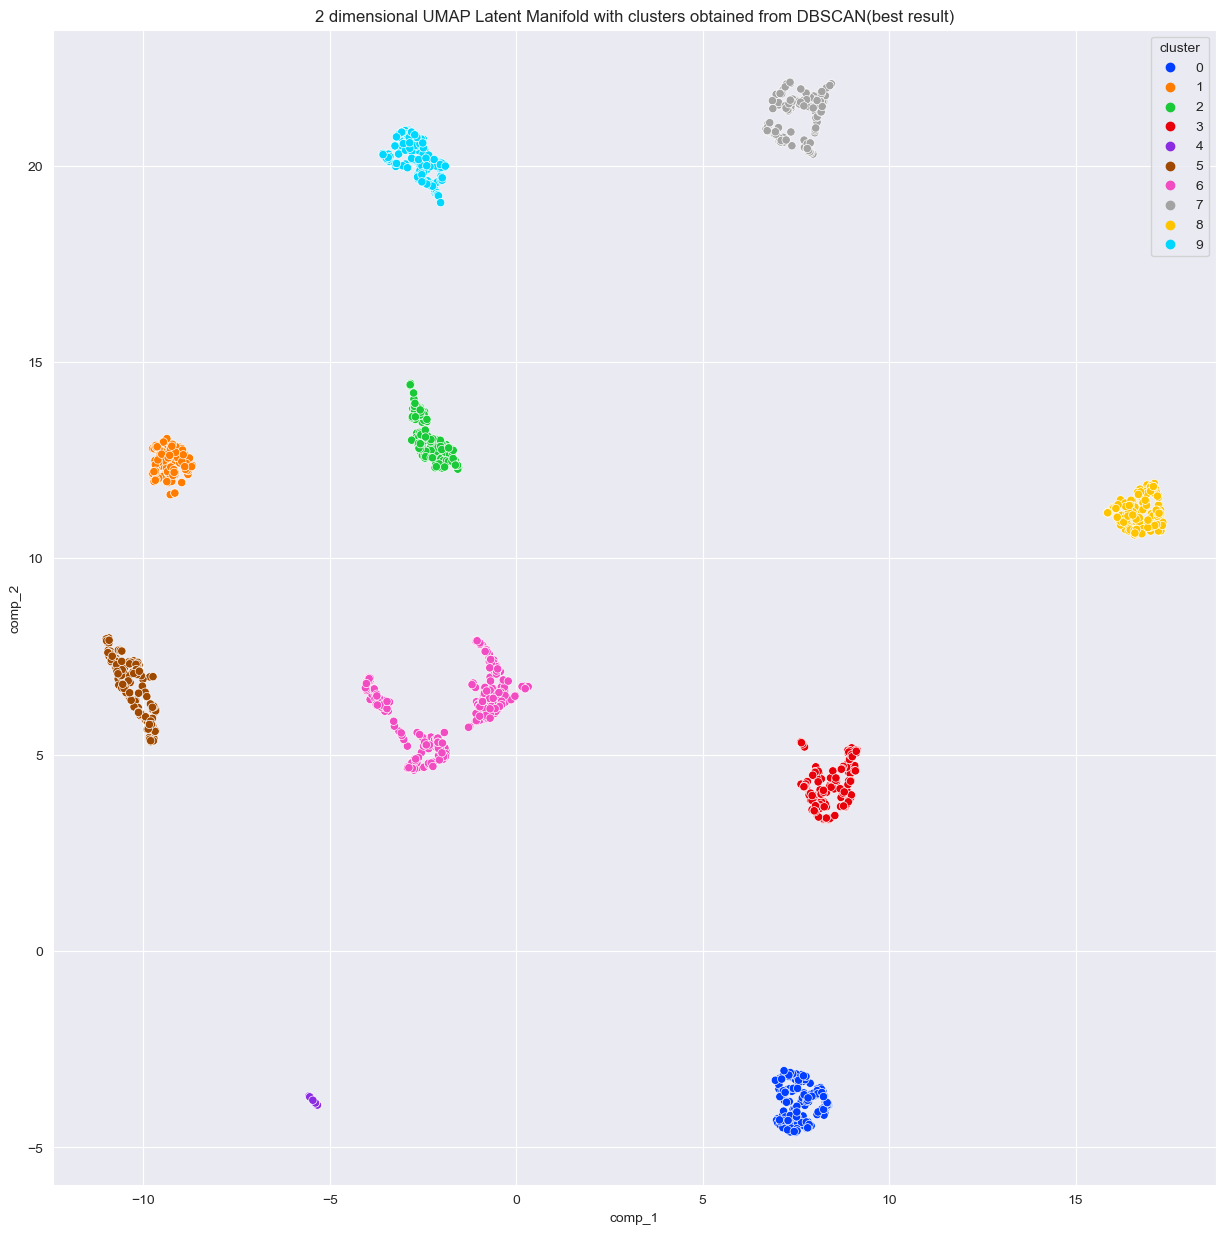

In [16]:
# Plotting the latent manifold
# Encode data points with the cluster labels 
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dataframe for the embeddings
embedding_df = pd.DataFrame(embeddings, columns=['comp_1', 'comp_2'])
embedding_df['cluster'] = best_dbscan_labels

# move all noise to the end of dataframe
embedding_df = embedding_df.sort_values(by='cluster')
embedding_df['cluster'] = embedding_df['cluster'].replace(-1, 'noise') #set -1 as 'noise'
embedding_df = embedding_df[embedding_df['cluster']!='noise']

# Plot the clusters
plt.figure(figsize=(15, 15))
sns.scatterplot(data=embedding_df, x='comp_1', y='comp_2', hue='cluster', palette='bright', legend='full')
plt.title('2 dimensional UMAP Latent Manifold with clusters obtained from DBSCAN(best result)')
plt.show()
